In [2]:
# Import necessary libraries
import pandas as pd

# Define file paths (Update these based on your system)
movies_file = r'D:\python\ML\5\movies.csv'
ratings_file = r'D:\python\ML\5\ratings.csv'

# Load the datasets
movies = pd.read_csv(movies_file)
ratings = pd.read_csv(ratings_file)

# Display first few rows
print("Sample of movies dataset:")
print(movies.head())

print("\nSample of ratings dataset:")
print(ratings.head())

# Check dataset info
print("\nMovies dataset info:")
print(movies.info())

print("\nRatings dataset info:")
print(ratings.info())

# Check unique values count
print("\nNumber of unique movies:", movies['movieId'].nunique())
print("Number of unique users:", ratings['userId'].nunique())

Sample of movies dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Sample of ratings dataset:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Movies dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 colum

In [3]:
# Drop the timestamp column (not needed for recommendations)
ratings = ratings.drop(columns=['timestamp'], errors='ignore')

# Merge movies and ratings datasets
merged_df = ratings.merge(movies, on="movieId")

# Display the cleaned dataset
print("\nSample of merged dataset:")
print(merged_df.head())

# Check for missing values
print("\nMissing values in merged dataset:")
print(merged_df.isnull().sum())

print("✅ Data cleaning & preprocessing complete!")


Sample of merged dataset:
   userId  movieId  rating                        title  \
0       1        1     4.0             Toy Story (1995)   
1       1        3     4.0      Grumpier Old Men (1995)   
2       1        6     4.0                  Heat (1995)   
3       1       47     5.0  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  

Missing values in merged dataset:
userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64
✅ Data cleaning & preprocessing complete!


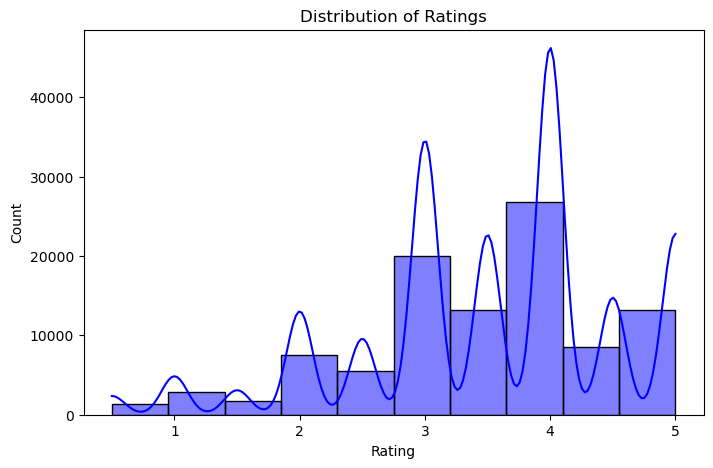


Top 10 most rated movies:
title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

Top 10 movies with highest average ratings:
title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5.0
Lesson Faust (1994)                          5.0
Eva (2011)                                   5.0
Who Kil

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Find most rated movies
most_rated = merged_df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print("\nTop 10 most rated movies:")
print(most_rated)

# Average rating per movie
average_ratings = merged_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 movies with highest average ratings:")
print(average_ratings)

print("✅ Exploratory Data Analysis complete!")

In [5]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-movie rating matrix
user_movie_matrix = merged_df.pivot_table(index='userId', columns='title', values='rating')

# Fill NaN values with 0
user_movie_matrix = user_movie_matrix.fillna(0)

# Convert to a sparse matrix
sparse_matrix = csr_matrix(user_movie_matrix)

# Compute similarity between users
user_similarity = cosine_similarity(sparse_matrix)

# Convert similarity matrix to a DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

print("✅ User-Based Collaborative Filtering model is ready!")

✅ User-Based Collaborative Filtering model is ready!


In [6]:
# Compute similarity between movies
movie_similarity = cosine_similarity(user_movie_matrix.T)

# Convert similarity matrix to a DataFrame
movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)

print("✅ Item-Based Collaborative Filtering model is ready!")

✅ Item-Based Collaborative Filtering model is ready!


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means clustering for evaluation (User-Based)
kmeans_user = KMeans(n_clusters=5, random_state=42, n_init=10)
user_clusters = kmeans_user.fit_predict(user_movie_matrix)

# Apply K-Means clustering for evaluation (Item-Based)
kmeans_item = KMeans(n_clusters=5, random_state=42, n_init=10)
item_clusters = kmeans_item.fit_predict(user_movie_matrix.T)

# Compute silhouette scores (higher = better clustering)
silhouette_scores = {
    'User-Based': silhouette_score(user_movie_matrix, user_clusters),
    'Item-Based': silhouette_score(user_movie_matrix.T, item_clusters)
}

# Display scores
print("\nSilhouette Scores:")
for model, score in silhouette_scores.items():
    print(f"{model}: {score:.2f}")

print("✅ Silhouette Score Evaluation Complete!")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(



Silhouette Scores:
User-Based: -0.02
Item-Based: 0.49
✅ Silhouette Score Evaluation Complete!


In [13]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute predicted ratings using user similarity
predicted_ratings = user_similarity_df.dot(user_movie_matrix) / user_similarity_df.sum(axis=1).values.reshape(-1, 1)

# Ensure there are no NaN values in predictions
predicted_ratings = np.nan_to_num(predicted_ratings)

# Get actual ratings
actual_ratings = user_movie_matrix.copy().values

# Flatten and filter zero values
actual_values = actual_ratings.flatten()
predicted_values = predicted_ratings.flatten()

# Filter out zero values (movies that were not rated)
valid_indices = actual_values > 0
actual_values = actual_values[valid_indices]
predicted_values = predicted_values[valid_indices]

# Compute MSE
mse = mean_squared_error(actual_values, predicted_values)
print("\nMean Squared Error (MSE):", mse)

print("✅ MSE Calculation Complete!")


Mean Squared Error (MSE): 9.444684826235058
✅ MSE Calculation Complete!


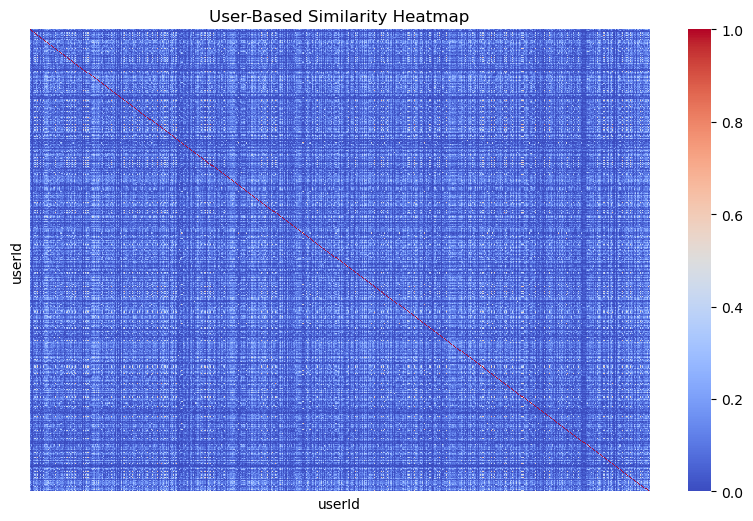

✅ User-Based Collaborative Filtering Visualization Complete!


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(user_similarity_df, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('User-Based Similarity Heatmap')
plt.show()

print("✅ User-Based Collaborative Filtering Visualization Complete!")

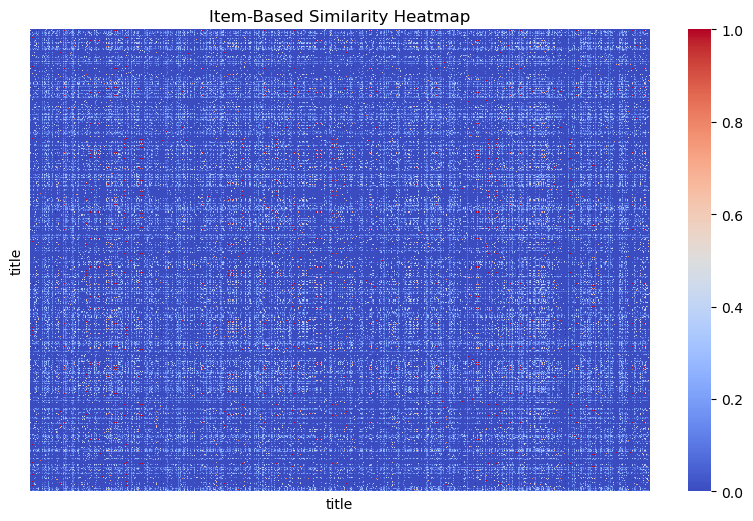

✅ Item-Based Collaborative Filtering Visualization Complete!


In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(movie_similarity_df, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Item-Based Similarity Heatmap')
plt.show()

print("✅ Item-Based Collaborative Filtering Visualization Complete!")

In [30]:
# Update userInput titles to include years as in the dataset
userInput = [
    {'title': 'breakfast club, the (1985)', 'rating': 5},
    {'title': 'toy story (1995)', 'rating': 3.5},
    {'title': 'jumanji (1995)', 'rating': 2},
    {'title': 'pulp fiction (1994)', 'rating': 5},
    {'title': 'akira (1988)', 'rating': 4.5}
]

# Convert to DataFrame
inputMovies = pd.DataFrame(userInput)
print("Updated User Input Movies:\n", inputMovies)

Updated User Input Movies:
                         title  rating
0  breakfast club, the (1985)     5.0
1            toy story (1995)     3.5
2              jumanji (1995)     2.0
3         pulp fiction (1994)     5.0
4                akira (1988)     4.5


In [31]:
# Standardize titles in the dataset and input
movies['title'] = movies['title'].str.strip().str.lower()
inputMovies['title'] = inputMovies['title'].str.strip().str.lower()

# Match userInput titles with movies dataset and fetch movieId
inputId = movies[movies['title'].isin(inputMovies['title'].tolist())]

# Merge movieId with user input
inputMovies = pd.merge(inputId, inputMovies, on='title')

# Drop unnecessary columns
inputMovies = inputMovies.drop(columns=['genres'])

print("\nUser Input Movies with movieId:\n", inputMovies)


User Input Movies with movieId:
    movieId                       title  rating
0        1            toy story (1995)     3.5
1        2              jumanji (1995)     2.0
2      296         pulp fiction (1994)     5.0
3     1274                akira (1988)     4.5
4     1968  breakfast club, the (1985)     5.0


In [32]:
# Find users who rated the same movies as the input user
userSubset = ratings[ratings['movieId'].isin(inputMovies['movieId'].tolist())]

print("\nUsers who have rated the same movies:\n", userSubset.head())


Users who have rated the same movies:
      userId  movieId  rating
0         1        1     4.0
16        1      296     3.0
320       4      296     1.0
422       4     1968     4.0
516       5        1     4.0


In [33]:
# Group users by userId
userSubsetGroup = userSubset.groupby(['userId'])

# Sort users by the number of movies rated in common with the input user
userSubsetGroup = sorted(userSubsetGroup, key=lambda x: len(x[1]), reverse=True)

print("\nTop 3 Users with Most Common Ratings:\n", userSubsetGroup[:3])


Top 3 Users with Most Common Ratings:
 [((91,),        userId  movieId  rating
14121      91        1     4.0
14122      91        2     3.0
14173      91      296     4.5
14316      91     1274     5.0
14383      91     1968     3.0), ((177,),        userId  movieId  rating
24900     177        1     5.0
24901     177        2     3.5
24930     177      296     5.0
25069     177     1274     2.0
25129     177     1968     3.5), ((219,),        userId  movieId  rating
31524     219        1     3.5
31525     219        2     2.5
31554     219      296     4.0
31628     219     1274     2.5
31680     219     1968     3.0)]


In [34]:
from math import sqrt

# Dictionary to store Pearson correlation values
pearsonCorrelationDict = {}

# Iterate through each user group
for name, group in userSubsetGroup:
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    
    # Get the number of common movies rated
    nRatings = len(group)
    
    # Get ratings for the common movies
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    tempRatingList = temp_df['rating'].tolist()
    tempGroupList = group['rating'].tolist()
    
    # Compute Pearson correlation
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList), 2) / float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList), 2) / float(nRatings)
    Sxy = sum(i * j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList) * sum(tempGroupList) / float(nRatings)
    
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy / sqrt(Sxx * Syy)
    else:
        pearsonCorrelationDict[name] = 0

print("\nComputed Pearson Correlation:\n", list(pearsonCorrelationDict.items())[:10])


Computed Pearson Correlation:
 [((91,), 0.43852900965351443), ((177,), 0.0), ((219,), 0.45124262819713973), ((274,), 0.716114874039432), ((298,), 0.9592712306918567), ((414,), 0.9376144618769914), ((474,), 0.11720180773462392), ((477,), 0.4385290096535153), ((480,), 0.7844645405527362), ((483,), 0.08006407690254357)]


In [35]:
# Convert to DataFrame
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index', columns=['similarityIndex'])

# Add userId column
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))

# Get top similar users
topUsers = pearsonDF.sort_values(by='similarityIndex', ascending=False)[:50]
print("\nTop Similar Users:\n", topUsers.head())


Top Similar Users:
      similarityIndex  userId
43               1.0  (132,)
181              1.0  (382,)
219              1.0  (602,)
130              1.0  (130,)
129              1.0  (125,)


In [39]:
# Extract the integer value from the tuple in userId
topUsers['userId'] = topUsers['userId'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# Convert userId to integer
topUsers['userId'] = topUsers['userId'].astype(int)

print("\nCleaned Top Users DataFrame:\n", topUsers.head())
print("\nData Types After Cleaning:\n", topUsers.dtypes)


Cleaned Top Users DataFrame:
      similarityIndex  userId
43               1.0     132
181              1.0     382
219              1.0     602
130              1.0     130
129              1.0     125

Data Types After Cleaning:
 similarityIndex    float64
userId               int32
dtype: object


In [40]:
# Merge top users with their movie ratings
topUsersRating = topUsers.merge(ratings, left_on='userId', right_on='userId', how='inner')

# Multiply similarity index with movie ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex'] * topUsersRating['rating']

# Sum similarity index and weighted ratings per movie
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex', 'weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex', 'sum_weightedRating']

# Compute weighted average recommendation score
recommendation_df = pd.DataFrame()
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating'] / tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index

print("\nWeighted Average Recommendation Score:\n", recommendation_df.head())


Weighted Average Recommendation Score:
          weighted average recommendation score  movieId
movieId                                                
1                                     3.444444        1
2                                     3.222222        2
3                                     3.666667        3
5                                     2.833333        5
6                                     3.807692        6


In [41]:
# Sort movies by recommendation score
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)

# Get top 10 recommended movies
top10_recommended_movies = movies[movies['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

print("\nTop 10 Movie Recommendations:\n", top10_recommended_movies)


Top 10 Movie Recommendations:
       movieId                                              title  \
1433     1956                             ordinary people (1980)   
1826     2427                          thin red line, the (1998)   
1842     2450                             howard the duck (1986)   
1846     2455                                    fly, the (1986)   
1865     2477                                  firewalker (1986)   
1877     2495  fantastic planet, the (planète sauvage, la) (1...   
1898     2522                                 airport '77 (1977)   
2288     3035                              mister roberts (1955)   
9380   163112               winnie the pooh goes visiting (1971)   
9382   163386      winnie the pooh and the day of concern (1972)   

                            genres  
1433                         Drama  
1826              Action|Drama|War  
1842       Adventure|Comedy|Sci-Fi  
1846  Drama|Horror|Sci-Fi|Thriller  
1865                     Adventure